## Multivariate Gaussain distribution

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set()

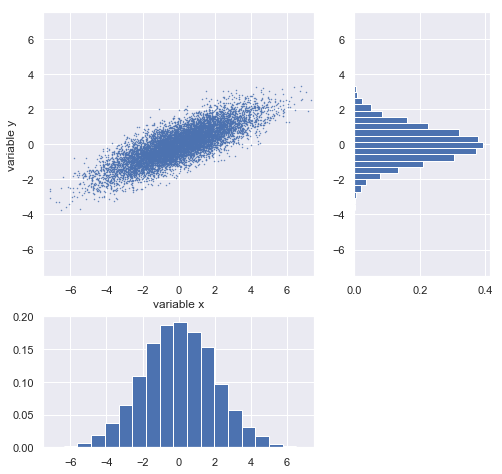

In [37]:
x_mean = np.array([[0],[0]])
x_cov  = np.array([[4,1.6],[1.6,1]])

x1,x2 = np.random.multivariate_normal(x_mean.flatten(),x_cov,10000).T

plt.figure(figsize=(8,8))
gs = GridSpec(2,2,width_ratios=[2,1],height_ratios=[2,1])
plt.subplot(gs[0])
plt.scatter(x1,x2,s=0.2)
#plt.axis('equal')
plt.xlim([-7.5,7.5])
plt.ylim([-7.5,7.5])
plt.ylabel('variable y')
plt.xlabel('variable x')

plt.subplot(gs[1])
plt.hist(x2,bins=20,orientation='horizontal',density=True)
plt.ylim([-7.5,7.5])

plt.subplot(gs[2])
plt.hist(x1,bins=20,density=True)
plt.xlim([-7.5,7.5])

#plt.show()

plt.savefig('/Users/xxue/Desktop/multivariate_gaussian.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Random sampling and sigma points

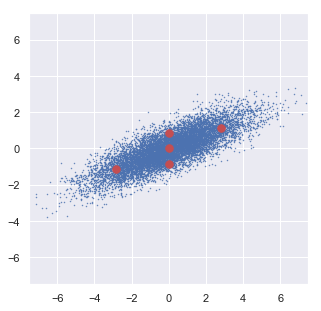

In [38]:
beta = 2
kappa = 0

alpha = 1 
# (1e-4 ~ 1)

L = 2
lambd = alpha**2*(L + kappa) - L
c = np.sqrt(L+lambd)

x_std = np.linalg.cholesky(x_cov)
x_sig = np.hstack((x_mean,x_mean + c*x_std,x_mean - c*x_std ))

plt.figure(figsize=(5,5))
plt.scatter(x1,x2,s=0.2)
plt.plot(x_sig[0,:],x_sig[1,:],'r.',markersize=15)
plt.xlim([-7.5,7.5])
plt.ylim([-7.5,7.5])
plt.show()

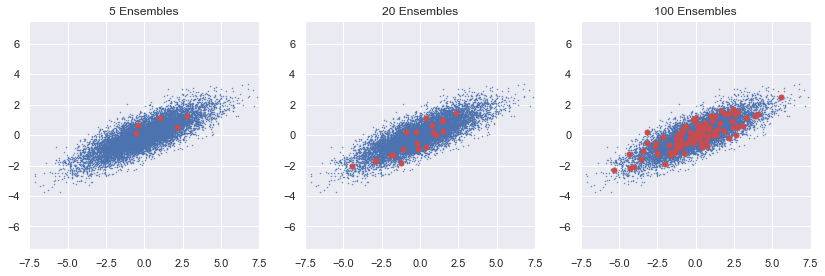

In [42]:
N = [5,20,100]

plt.figure(figsize=(14,4.2))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(x1,x2,s=0.2)
    
    #np.random.seed(10)
    x_ensembles = np.random.multivariate_normal(x_mean.flatten(),x_cov,N[i]).T
    
    plt.plot(x_ensembles[0,:],x_ensembles[1,:],'r.',markersize=10)
    plt.xlim([-7.5,7.5])
    plt.ylim([-7.5,7.5])
    
    plt.title('{} Ensembles'.format(N[i]))
plt.show()

In [43]:
# draw the ellipse (calculated and true) instead of the 10000 samples